# Ocena jakości wina - projekt zespołowy PRiAD

Zaimportowanie bibliotek oraz wczytanie pliku z danymi

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

wine = pd.read_csv('data/winequality-red.csv', sep=";", usecols = range(0,12))

Ilość brakujących danych: 0
Ilość obiektów: 1599
Atrybuty: 
	fixed acidity
	volatile acidity
	citric acid
	residual sugar
	chlorides
	free sulfur dioxide
	total sulfur dioxide
	density
	pH
	sulphates
	alcohol
	quality


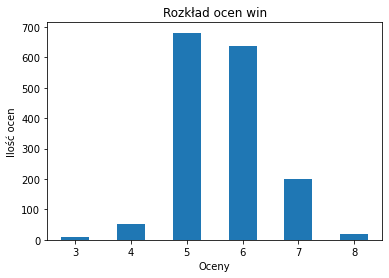

In [87]:
missingValues = wine.isnull().sum().sum()
numberOfObjects = len(wine)
print("Ilość brakujących danych: " + str(missingValues))
print("Ilość obiektów: " + str(numberOfObjects))
df = wine['quality'].value_counts().sort_index(ascending = True)
df.plot(kind="bar", rot=0, title="Rozkład ocen win", xlabel="Oceny", ylabel="Ilość ocen")
print("Atrybuty: ")
for col in wine.columns: 
    print("\t" + col)

## Przedstawienie informacji o zbiorze

## Analiza klasyfikacji atrybutów

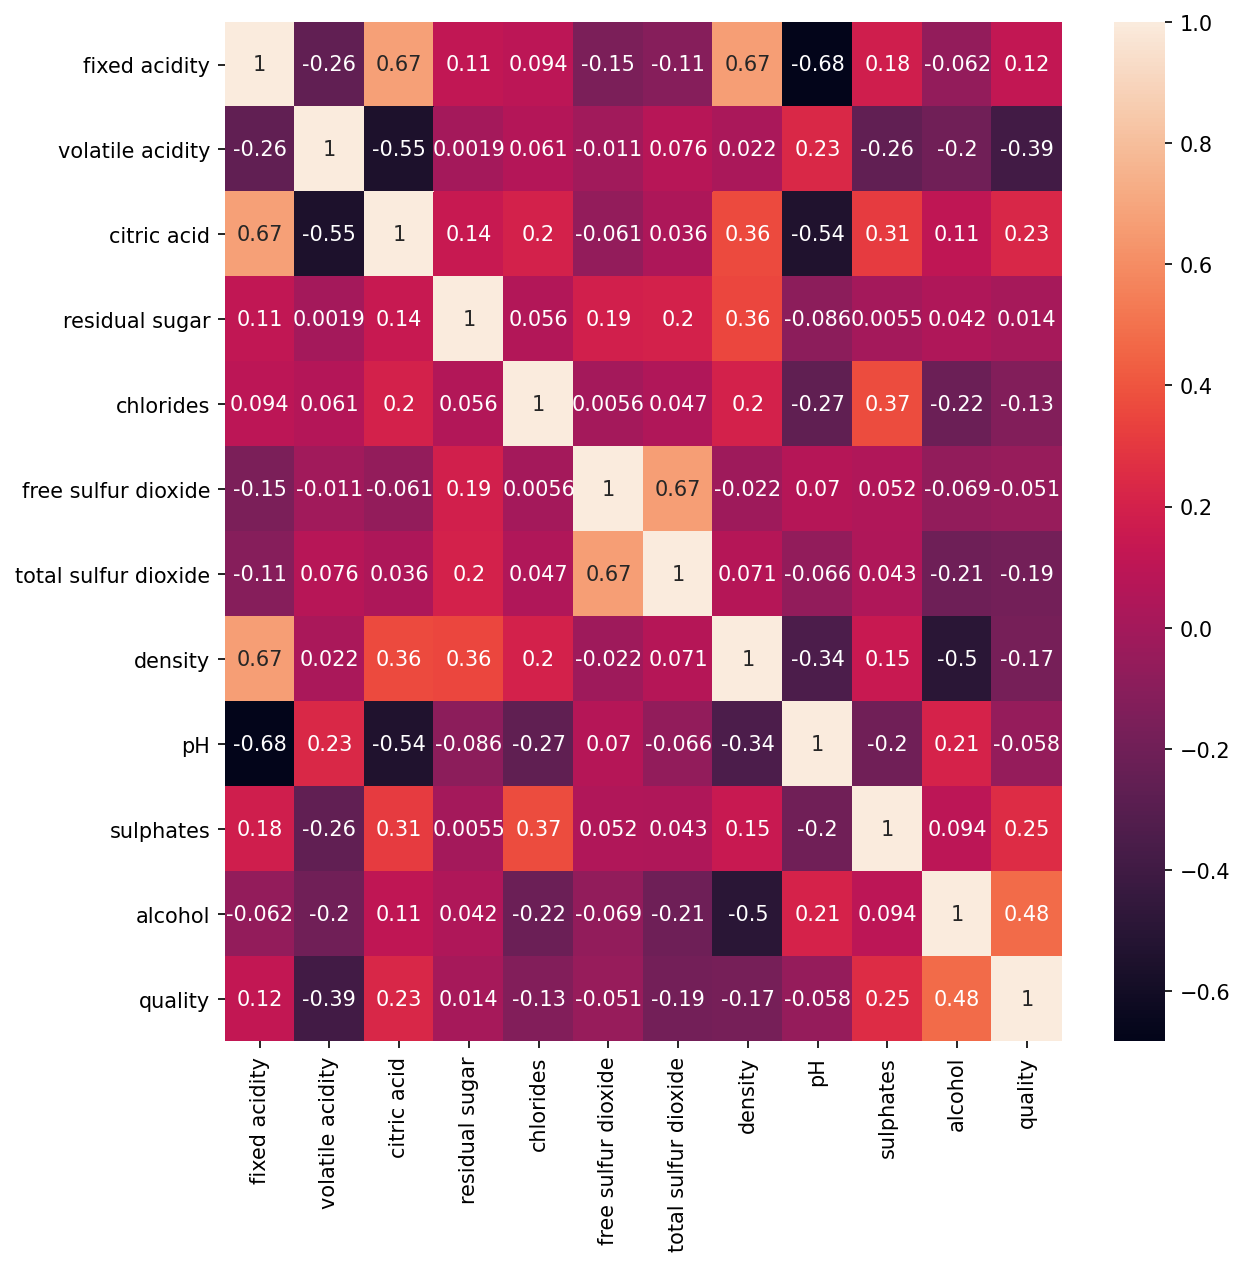

In [111]:
plt.figure(figsize=(9,9), dpi= 150)
sns.heatmap(wine.corr(), annot = wine.corr())

<AxesSubplot:title={'center':'Wykres bewzględnej korelacji'}>

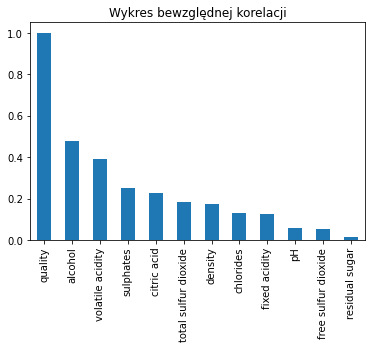

In [98]:
correlations = wine.corr()['quality']
correlations = correlations.abs().sort_values(ascending = False)
correlations.plot(kind = 'bar', title = 'Wykres bewzględnej korelacji')

Atrybutami w podanej kolejności najbardziej wpływając na jakość wina: 
- Alcohol
- Volatile acidity
- Sulphates
- Citric acid
- Total sulfur dioxide
- Density
- Chlorides
- Fixed acidity
- pH
- Free sulfur dioxide
- Residual sugar

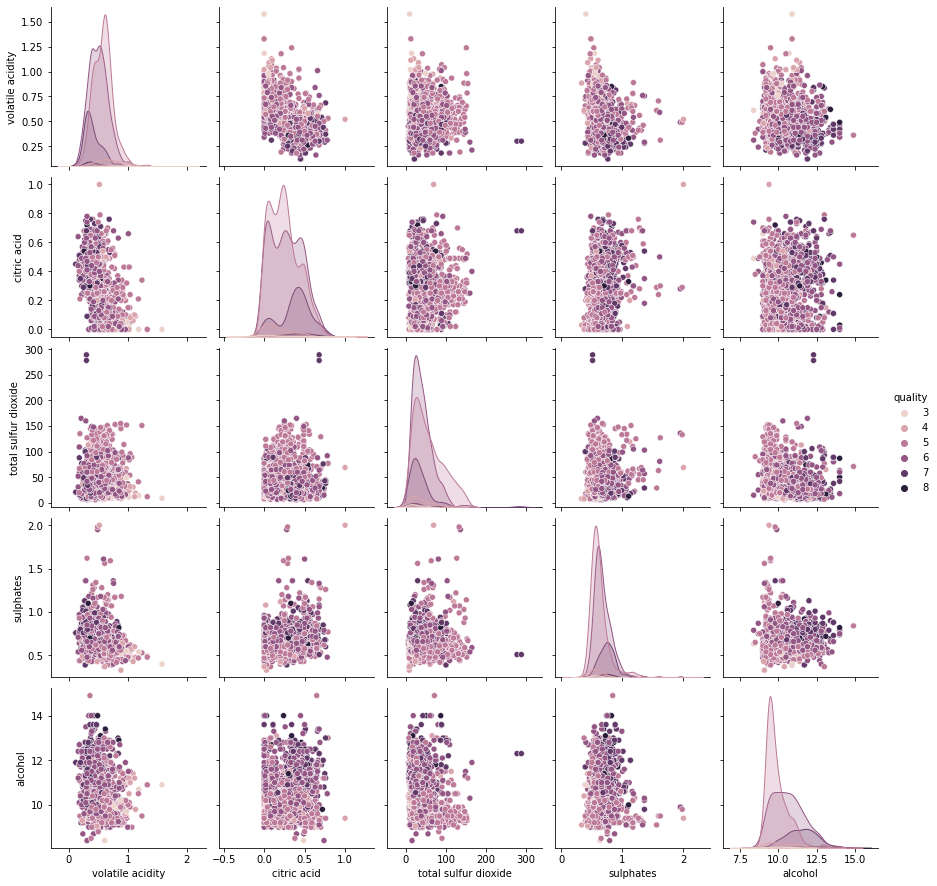

In [16]:
droppedUnused = wine.drop(columns=['density','chlorides','fixed acidity','pH','free sulfur dioxide','residual sugar'])

sns.pairplot(droppedUnused, kind="scatter", hue = "quality")

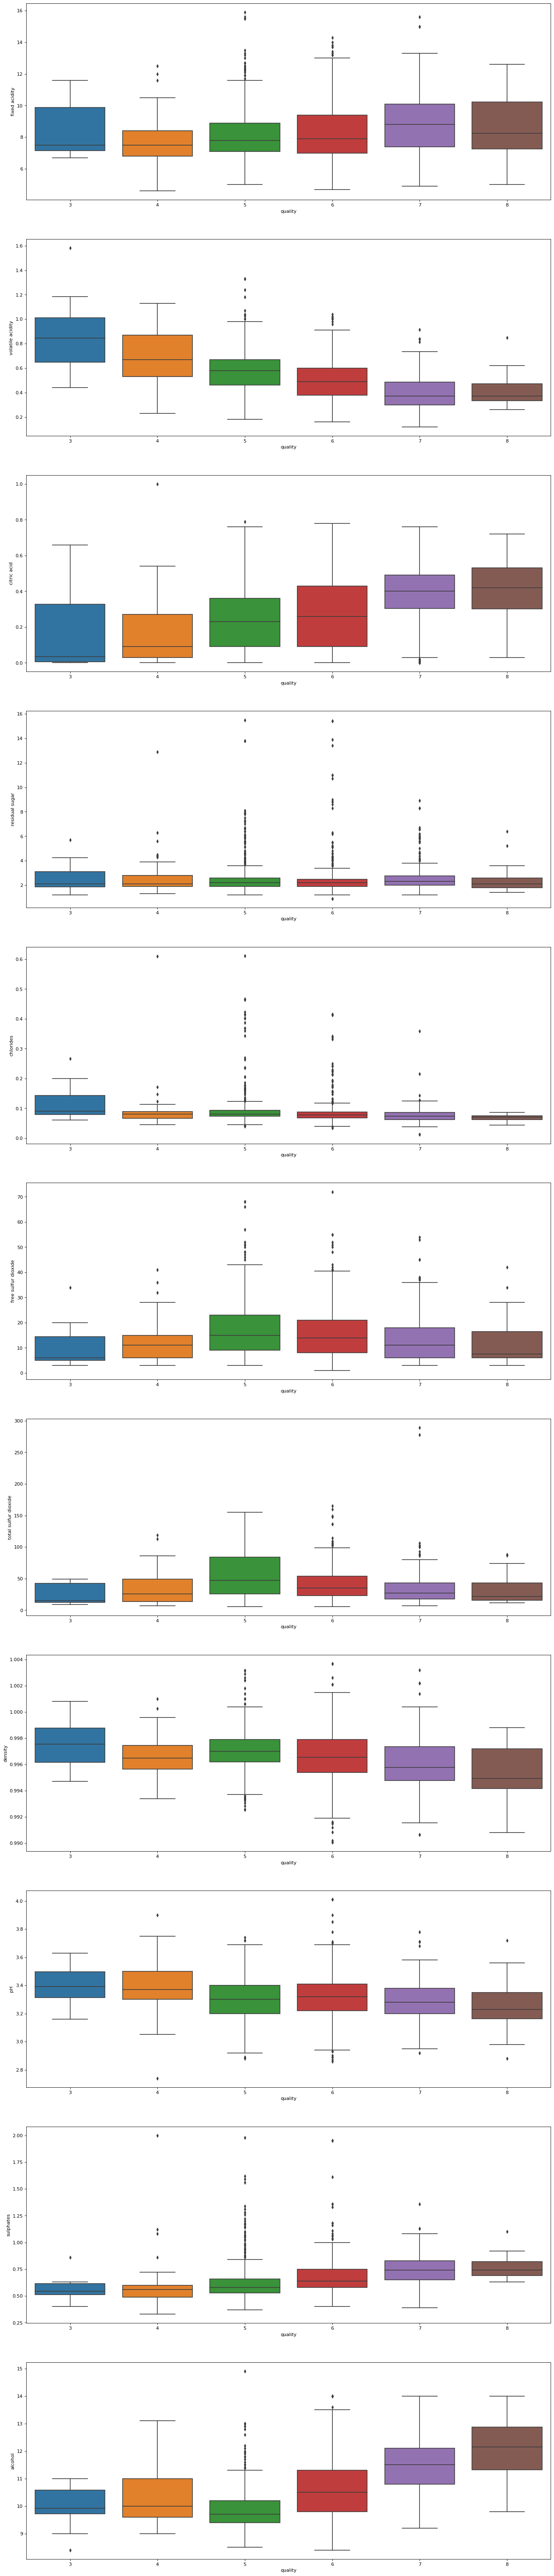

In [29]:
y = 1
plt.figure(figsize=(20,100), dpi= 80)
for atribute in wine.columns:
    if(atribute=="quality"):
        continue
    plt.subplot(11,1,y)
    sns.boxplot(x="quality", y=atribute, data=wine)
    y+=1
    

Po wykresach pudełkowych i po macierzy korelacji można zauważyć pewne zależności:

1. Na jakość wina pozytywnie wpływa wzrost alkoholu (alcohol), siarczanów (sulphates) i kwasu cytrynowego (citric acid). Im wyższy jest współczynnik tych atrybutów tym więcej win jest ocenianych pozytywnie. 

Dla alkoholu powyżej 12 % większość win jest oceniana na ocenę 8, która jest najwyższą oceną występującą w naszym zbiorze. 
Dla siarczanów jest to poziom około 0.75 gdzie wina dostają wyższe oceny ( częściowo 6, większość 7-8 ).
Dla kwasu cytrynowego od poziomu 0.4 również oceny win głównie zostają na poziomie 7-8.

2. Negatywnie natomiast na jakość wina wpływają głównie: gęstość (density), pH oraz lotna kwasowość (volatile acidity).

W gęstości różnice są minimalne ale nie zerowe i można zauważyć na wykresie że wina wyżej oceniane mają gęstość znakomo mniejszą.
W pH podobnie jak w gęstości różnice również nie są duże jednak ilość pH w winach lepiej ocenianych jest mniejsza.
W lotnej kwasowości ta różnica jest bardziej widoczna gdyż widać że wina z ocenami 7 i 8 znacząco odstają od reszty ocen w przypadku zmniejszenia wartości tego atrybutu.

Pozostałe atrybuty nie wykazują znaczącego wpływu na ocenę jakości wina.

In [ ]:
Regresja liniowa dla wybranych atrybutów

Dane i wybrane atrybuty
       alcohol  sulphates  citric acid
0         9.4       0.56         0.00
1         9.8       0.68         0.00
2         9.8       0.65         0.04
3         9.8       0.58         0.56
4         9.4       0.56         0.00
...       ...        ...          ...
1594     10.5       0.58         0.08
1595     11.2       0.76         0.10
1596     11.0       0.75         0.13
1597     10.2       0.71         0.12
1598     11.0       0.66         0.47

[1599 rows x 3 columns] 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Porównanie kilku modeli regresji
                 LinearRegression  RidgeRegression  LassoRegression  ElasticNet
learning_error          0.481358         0.481361         0.671042    0.590411
general_error           0.410324         0.410303         0.575254    0.496799


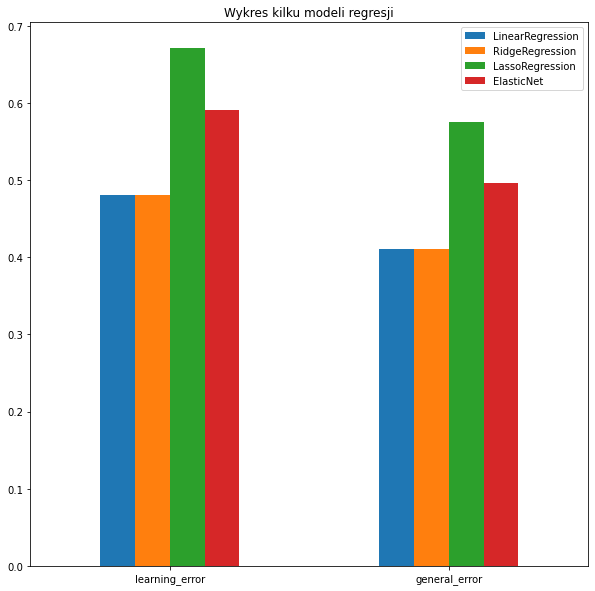

In [113]:
regressor = LinearRegression() 
#print(wine.columns)
# x = wine.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(wine)
# df = pd.DataFrame(x_scaled,columns=wine.columns)
x = wine[['alcohol','sulphates', 'citric acid']]
y = wine['quality']
print("Dane i wybrane atrybuty\n", x, y)

x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Wybranie kilku modelu regresji i wpisanie do hashMapy
regressors = {}
regressors['LinearRegression'] = LinearRegression()
regressors['RidgeRegression'] = Ridge(alpha=0.5) # 0 < alpha < 1
regressors['LassoRegression'] = Lasso(alpha=5) # alpha > 0
regressors['ElasticNet'] = ElasticNet(alpha=0.5, l1_ratio = 0.5) # alpha > 0

#Stworzenie hashMapy zbierającą dane o jakości dobrania
check_fit = {}

for type in regressors:
    this_regressor = regressors[type]
    this_regressor.fit(x_ucz,y_ucz) 
    
    y_pred_ucz = this_regressor.predict(x_ucz)
    e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
    y_pred_test = this_regressor.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    #clf = svm.SVC(kernel='linear', C=1).fit(x_ucz,y_ucz)
    #scores = cross_val_score(clf, x, y, cv=5)
    #print (clf.score(x_test, y_test))
    check_fit[type] = {"learning_error" : e_ucz, "general_error" : e_test}
   

#rysowanie wykresu porównującego błędy
df_for_comparison = pd.DataFrame(check_fit)
df_for_comparison.plot.bar(rot=0, figsize=(10,10), title = "Wykres kilku modeli regresji")

print("\nPorównanie kilku modeli regresji\n", df_for_comparison)




Najmniejszy błąd uczenia i generalizacji zapewnia regresja liniowa (linear) oraz regresja grzbietowa (ridge). Najlepszym rozwiązaniem jest zatem regresja liniowa.

Czy można uzyskać jeszcze mniejszy błąd uczenia ?

In [145]:
lm = LinearRegression()
#k powinno sie znajdowac pomiedzy 5 a 10
for k_fold in range (6,10):
    scores = cross_val_score(lm, x, y, cv = k_fold, scoring = "neg_mean_squared_error")
    scores = abs(scores)
    #print (scores)
    print ("K = ",k_fold, " Srednia: ", scores.mean())

K =  6  Srednia:  0.48865969525547975
K =  7  Srednia:  0.48688086949219445
K =  8  Srednia:  0.4847518877756961
K =  9  Srednia:  0.48465520334593903
